<a href="https://colab.research.google.com/github/mbamiluka/MachineLearning_CryptoPricePredict/blob/main/ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FULL TABLE OF DATA 

           Date      Open      High  ...     Close  Adj Close        Volume
0    2020-11-14  0.002821  0.002821  ...  0.002773   0.002773  3.033438e+07
1    2020-11-15  0.002773  0.002813  ...  0.002775   0.002775  2.513168e+07
2    2020-11-16  0.002775  0.003009  ...  0.002886   0.002886  5.206328e+07
3    2020-11-17  0.002908  0.002976  ...  0.002936   0.002936  4.663146e+07
4    2020-11-18  0.002936  0.002999  ...  0.002909   0.002909  4.946006e+07
..          ...       ...       ...  ...       ...        ...           ...
177  2021-05-10  0.569687  0.569687  ...  0.449964   0.449964  1.651452e+10
178  2021-05-11  0.450488  0.546651  ...  0.495231   0.495231  1.456698e+10
179  2021-05-12  0.493742  0.519975  ...  0.385376   0.385376  8.621338e+09
180  2021-05-13  0.392176  0.519461  ...  0.490374   0.490374  1.866317e+10
181  2021-05-14       NaN       NaN  ...       NaN        NaN           NaN

[182 rows x 7 columns]
-------------------------------------------

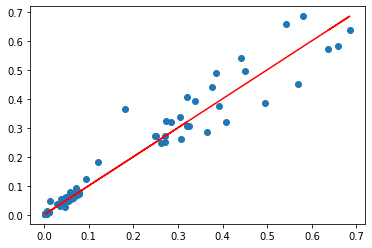

Random Forest Regressor score:  0.9462624797184603
Linear Regression score:  0.9633974142995674 

LINEAR REGRESSION PRICE PREDICTIONS 

[0.07251096 0.01159642 0.00656227 0.44966327 0.54027987 0.04022341
 0.06543083 0.00668029 0.05669149 0.06188432 0.05510171 0.01259809
 0.06052958 0.00688757 0.32442254 0.24986938 0.07290172 0.00658905
 0.01378819 0.00710873 0.06031933 0.00648888 0.00757882 0.05666471
 0.00636888 0.06672804 0.49455702 0.00676955 0.05791829 0.05686505
 0.00627169 0.05662405 0.06458486 0.01309991 0.06436668 0.32027502] 

ACTUAL PRICES 

[0.070069 0.007482 0.003158 0.495231 0.657633 0.053289 0.056591 0.003397
 0.047392 0.057234 0.061949 0.009067 0.078782 0.003329 0.305169 0.270212
 0.072896 0.003416 0.009742 0.003858 0.058328 0.003079 0.003727 0.054052
 0.003507 0.074649 0.385376 0.003342 0.053556 0.053657 0.002936 0.061986
 0.063845 0.009767 0.061684 0.306925]
--------------------------------------------------------------------------------
RANDOM FOREST REGRESSOR PRICE PR

In [ ]:
'''
Machine Learning Final Project - Crypto price prediction
using Dogecoin. Please don't make any investments based
of the prediction of this program.

__author__: Mbami Luka

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from termcolor import colored

sep="--------------------------------------------------------------------------------"
# You can download and use your own crypto or stock data from Yahoo Finance.
dataFrame = pd.read_csv("DOGE-USD.csv") # May14th 2020 to May14th 2021
print( colored("FULL TABLE OF DATA \n","blue" ,attrs=["bold"]) )
print(dataFrame)
print(sep)


crypto = input("What's the name of your crypto? ")
# extract the closing price column only
dataFrame = dataFrame[['Close']]
numDaysAhead = int ( input ( "Predict the price of " + crypto + " for the next __ day(s) \n") )
print("We will be predicting the price of",crypto,"in the next", numDaysAhead, "days")
print(sep)

# Create prediction or y column
# shift up in the table to get the next day price = y
dataFrame["Prediction"] = dataFrame[["Close"]].shift(-numDaysAhead)
print( colored("HISTORICAL DATA OF PRICE VS n DAYS AHEAD PRICE \n","blue" ,attrs=["bold"]) )
print ( dataFrame)


# extract independent variable or X and remove NAs
X = np.array( dataFrame.drop( ['Prediction'], 1) )
X = X[ : len ( dataFrame) -numDaysAhead - 1]


# extract dependent variable or Y and remove NAs
Y = np.array( dataFrame['Prediction'] )
Y = Y[: -numDaysAhead - 1]


x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

plt.scatter(X, Y)
plt.plot(x_train, x_train, color="red")
plt.show()

forestReg = RandomForestRegressor( n_estimators = 2, random_state = 582)
forestReg.fit ( x_train, y_train)
print( "Random Forest Regressor score: ", forestReg.score( x_test, y_test))

linearReg = LinearRegression().fit ( x_train, y_train)
print( "Linear Regression score: ", linearReg.score ( x_test, y_test),"\n")

linearReg_Prediction = linearReg.predict(x_test)
print( colored("LINEAR REGRESSION PRICE PREDICTIONS \n","blue" ,attrs=["bold"]) )
print(linearReg_Prediction,"\n")

print( colored("ACTUAL PRICES \n","blue" ,attrs=["bold"]) )
print(y_test)
print(sep)


forestReg_Prediction = forestReg.predict(x_test)
print( colored("RANDOM FOREST REGRESSOR PRICE PREDICTIONS \n","blue" ,attrs=["bold"]) )
print(forestReg_Prediction,"\n")

print( colored("ACTUAL PRICES \n","blue" ,attrs=["bold"]) )
print(y_test)
print(sep)

#plot2
